In [52]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [53]:
wines = pd.read_csv('C:\\Users\\deepak\\Downloads\\winemag-data-130k-v2.csv', index_col=0)

In [54]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [55]:
print("There are {} observations and {} features in this dataset. \n".format(wines.shape[0], wines.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(wines.variety.unique()), ", ".join(wines.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(wines.country.unique()), ", ".join(wines.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [56]:
wines[["country", "description", "points"]].head(100)

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87
5,Spain,Blackberry and raspberry aromas show a typical...,87
6,Italy,"Here's a bright, informal red that opens with ...",87
7,France,This dry and restrained wine offers spice in p...,87
8,Germany,Savory dried thyme notes accent sunnier flavor...,87
9,France,This has great depth of flavor with its fresh ...,87


In [57]:
# Groupby by country
countryData = wines.groupby("country")

In [58]:
countryData.describe()

points                                          \
                          count       mean       std   min    25%   50%   
country                                                                   
Argentina                3800.0  86.710263  3.179627  80.0  84.00  87.0   
Armenia                     2.0  87.500000  0.707107  87.0  87.25  87.5   
Australia                2329.0  88.580507  2.989900  80.0  87.00  89.0   
Austria                  3345.0  90.101345  2.499799  82.0  88.00  90.0   
Bosnia and Herzegovina      2.0  86.500000  2.121320  85.0  85.75  86.5   
Brazil                     52.0  84.673077  2.340782  80.0  83.00  85.0   
Bulgaria                  141.0  87.936170  2.077817  80.0  87.00  89.0   
Canada                    257.0  89.369650  2.384752  82.0  88.00  90.0   
Chile                    4472.0  86.493515  2.692959  80.0  85.00  86.0   
China                       1.0  89.000000       NaN  89.0  89.00  89.0   
Croatia                    73.0  87.219178  2.399344  81.0  86.00  88.0   
Cyprus                     11.0  87.181818  1.601136  85.0  86.00  87.0   
Czech Republic             12.0  87.250000  1.712255  84.0  86.50  88.0   
Egypt                       1.0  84.000000       NaN  84.0  84.00  84.0   
England                    74.0  91.581081  1.843216  89.0  90.00  91.0   
France                  22093.0  88.845109  3.044423  80.0  87.00  89.0   
Georgia                    86.0  87.686047  2.087845  82.0  87.00  88.0   
Germany                  2165.0  89.851732  2.469351  81.0  88.00  90.0   
Greece                    466.0  87.283262  2.185293  82.0  86.00  87.0   
Hungary                   146.0  89.191781  2.686659  81.0  88.00  89.0   
India                       9.0  90.222222  1.715938  87.0  90.00  90.0   
Israel                    505.0  88.471287  2.478412  80.0  87.00  89.0   
Italy                   19540.0  88.562231  2.649756  80.0  87.00  88.0   
Lebanon                    35.0  87.685714  2.784109  82.0  86.50  88.0   
Luxembourg                  6.0  88.666667  0.816497  88.0  88.00  88.5   
Macedonia                  12.0  86.833333  1.749459  84.0  85.75  87.0   
Mexico                     70.0  85.257143  2.722348  80.0  83.00  85.0   
Moldova                    59.0  87.203390  2.419601  82.0  86.00  88.0   
Morocco                    28.0  88.571429  1.687175  85.0  88.00  88.5   
New Zealand              1419.0  88.303030  2.435008  80.0  87.00  88.0   
Peru                       16.0  83.562500  1.860779  80.0  82.00  84.0   
Portugal                 5691.0  88.250220  2.996122  80.0  86.00  88.0   
Romania                   120.0  86.400000  1.716945  82.0  85.00  86.0   
Serbia                     12.0  87.500000  1.314257  86.0  86.00  87.5   
Slovakia                    1.0  87.000000       NaN  87.0  87.00  87.0   
Slovenia                   87.0  88.068966  1.730661  82.0  87.00  88.0   
South Africa             1401.0  88.056388  2.435826  82.0  86.00  88.0   
Spain                    6645.0  87.288337  3.066284  80.0  85.00  87.0   
Switzerland                 7.0  88.571429  2.507133  83.0  89.00  89.0   
Turkey                     90.0  88.088889  1.975379  84.0  87.00  88.0   
US                      54504.0  88.563720  3.114840  80.0  86.00  88.0   
Ukraine                    14.0  84.071429  1.591530  82.0  83.00  84.0   
Uruguay                   109.0  86.752294  2.687957  80.0  85.00  87.0   

                                        price                              \
                          75%    max    count       mean        std   min   
country                                                                     
Argentina               89.00   97.0   3756.0  24.510117  23.430122   4.0   
Armenia                 87.75   88.0      2.0  14.500000   0.707107  14.0   
Australia               91.00  100.0   2294.0  35.437663  49.049458   5.0   
Austria                 92.00   98.0   2799.0  30.762772  27.224797   7.0   
Bosnia and Herzegovina  87.25   88.

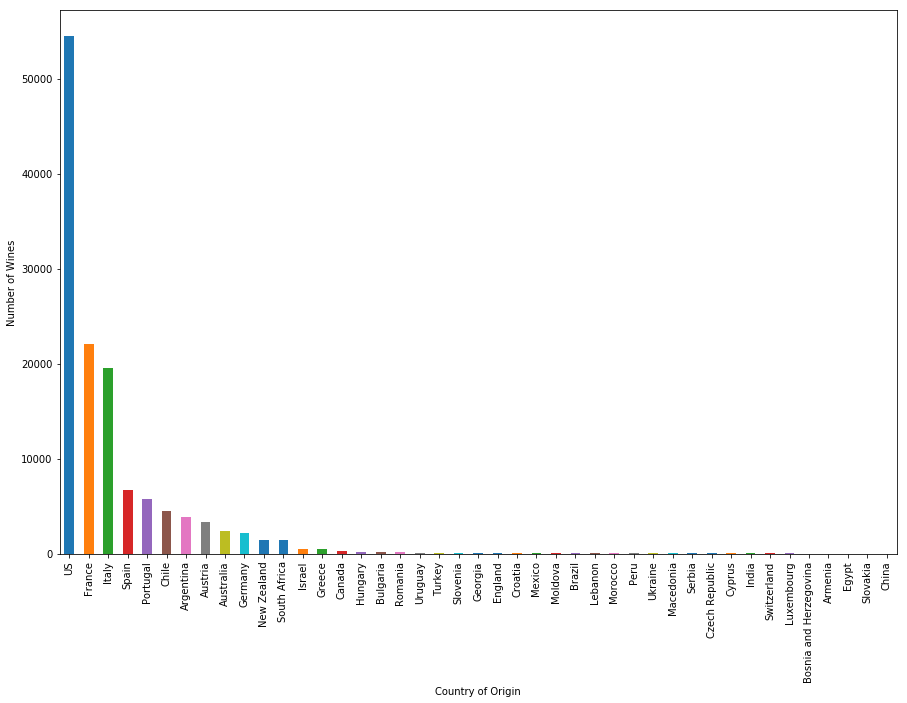

In [59]:
plt.figure(figsize=(15,10))
countryData.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

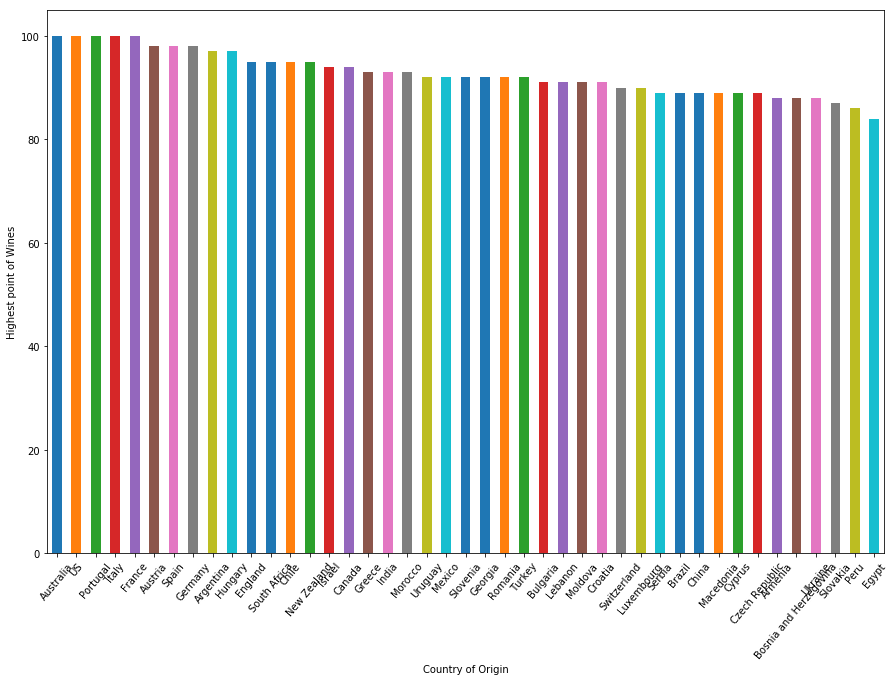

In [60]:
plt.figure(figsize=(15,10))
countryData.max().sort_values(by="points", ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

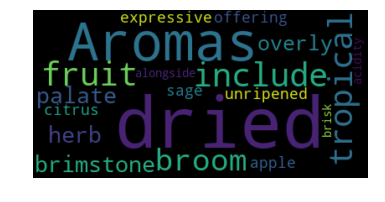

In [61]:
# Start with one review:
text = wines.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

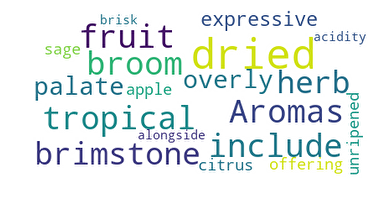

In [62]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()

In [63]:
text = " ".join(review for review in wines.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


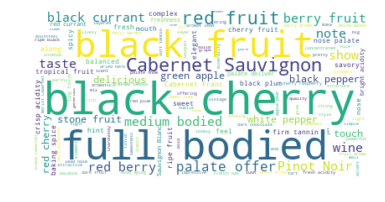

In [64]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Since we are updating the stop words list, then we have to manually specify the stopwords, if not then it will take the default list of stop words automatically
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
wine_mask = np.array(Image.open("C:\\Users\\deepak\\Downloads\\wine_mask.png"))
wine_mask[100] # Color codes of image at 101th line

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 1, 8,

In [66]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [67]:
#Since, this image library considers white color as 255 code, but we have white color with 0, hence we need to transform the codes using the function defined.

# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]), np.int32) #Creating new array with m rows and n columns

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [68]:
transformed_wine_mask[100]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

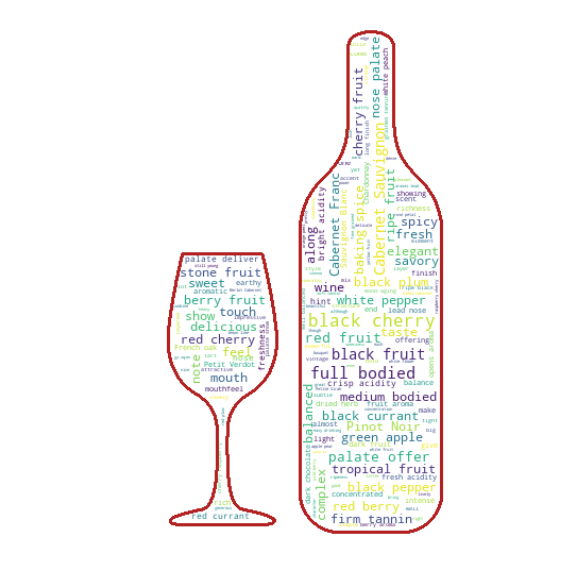

In [69]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
                       stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("C:\\Users\\deepak\\Downloads\\wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
countryData.size().sort_values(ascending=False).head(5)

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [71]:
france = " ".join(r for r in wines[wines["country"]=="France"].description)

In [72]:
france_mask = np.array(Image.open("C:\\Users\\deepak\\Downloads\\france.png"))

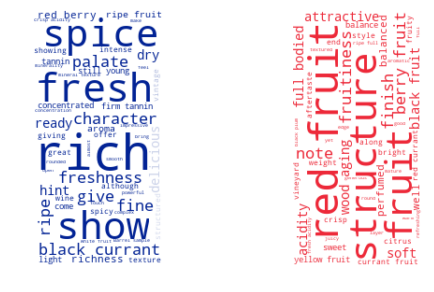

In [73]:
# Generate a word cloud image
# Since this image is not black and white as previous, hence we need to use RGBA to operate on it.
wordcloud_France = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask=france_mask).generate(france)
image_colors = ImageColorGenerator(france_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_France.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

References: https://www.datacamp.com/community/tutorials/wordcloud-python